In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_df = pd.read_csv("auto-mpg.csv")
raw_df['horsepower'] = (raw_df['horsepower']).astype(int)

# plotting all numerical values against each other
# raw_df.hist(figsize=(12,8));

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.2+ KB


## Correlation Heatmap

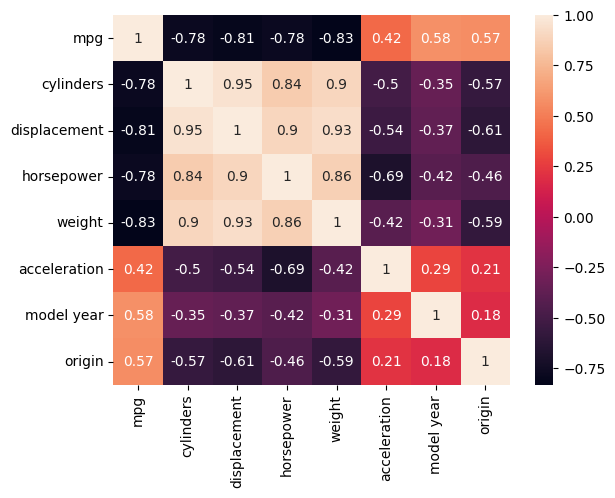

In [35]:
import seaborn as sb

#create correlation heatmap of numerical values in raw_df
dataplot = sb.heatmap(raw_df.corr(numeric_only=True), annot=True)


We see that the factors which show the highest correlation with ```mpg``` are the **number of cylinders, displacement,** **horsepower** and **weight** of the vehicle, with the rest also having a significant, albeit weaker, correlation.

As all variables affect ```mpg``` significantly, we don't need to remove any of them.

## Data Preprocessing

In [36]:
#Separating data into train and test datasets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)

#Separating target column
raw_df = train_df.drop(["mpg"], axis=1)
train_targets = train_df["mpg"].copy()
test_targets = test_df["mpg"].copy()

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 258 to 102
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           313 non-null    float64
 1   cylinders     313 non-null    int64  
 2   displacement  313 non-null    float64
 3   horsepower    313 non-null    int32  
 4   weight        313 non-null    int64  
 5   acceleration  313 non-null    float64
 6   model year    313 non-null    int64  
 7   origin        313 non-null    int64  
 8   car name      313 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 23.2+ KB


In [60]:
#preparing preprocessing pipelines for numerical and categorical values
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


num_cols = ["cylinders", "displacement", "horsepower", 
            "weight", "acceleration", "model year"]
cat_cols = ["origin"]

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

In [10]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, num_cols),
    (cat_pipeline, cat_cols),
)

prepared_data = preprocessing.fit_transform(raw_df)
prepared_data.shape

#getting the prepared data as a dataframe(not necessary)
prepared_df = pd.DataFrame(
    prepared_data,
    columns=preprocessing.get_feature_names_out(),
    index=raw_df.index)
prepared_df.head()

,pipeline-1__cylinders,pipeline-1__displacement,pipeline-1__horsepower,pipeline-1__weight,pipeline-1__acceleration,pipeline-1__model year,pipeline-2__origin_1,pipeline-2__origin_2,pipeline-2__origin_3
258,0.304862,0.284578,0.141429,0.754803,1.121759,0.494528,1.0,0.0,0.0
182,-0.873184,-0.535880,-0.329499,-0.493129,-0.228940,-0.057298,1.0,0.0,0.0
172,0.304862,-0.236655,-0.198685,-0.002530,-0.371118,-0.333211,1.0,0.0,0.0
63,1.482907,1.182255,1.187934,1.368052,-0.726565,-1.160950,1.0,0.0,0.0
340,-0.873184,-1.057113,-1.062052,-1.323099,0.304231,1.322266,1.0,0.0,0.0


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

model = make_pipeline(preprocessing, LinearRegression())
model.fit(train_df, train_targets)

train_preds = model.predict(train_df)
test_preds = model.predict(test_df)

train_rmse = root_mean_squared_error(train_targets, train_preds)
test_rmse = root_mean_squared_error(test_targets, test_preds)

print(train_rmse, test_rmse)

3.287831254830925 3.2561140968474005
